# AM 205 - Assignment 5

## by Jonathan Guillotte-Blouin

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import line_search, fsolve

### Question 1: Rosenbrock function

#### a) Minimize Rosenbrock's function using steepest descent.

$$ f(x,y) = 100 \left(y - x^2\right)^2 + (1 - x)^2 $$

$$ \frac{\partial f}{\partial x} = 200 \left(y - x^2\right) (-2x) + 2 (1-x) (-1) = 2 \left(200x^3 - 200xy + x - 1\right) $$

$$ \frac{\partial f}{\partial y} = 200 \left(y - x^2\right)$$

$$ \nabla f(x, y) = \left( \frac{\partial f}{\partial x} \; \; \frac{\partial f}{\partial y} \right) = \left( 2 \left(200x^3 - 200xy + x - 1\right) \, \, 200 \left(y - x^2\right) \right)$$

In [177]:
def f(point):
    x, y = point
    firstTerm = 100 * (y - x**2)**2
    secondTerm = (1-x)**2
    
    return firstTerm + secondTerm

def grad_f(point):
    x, y = point
    grad_x = 2 * (200 * x**3 - 200*x*y + x - 1)
    grad_y = 200 * (y - x**2)
    
    return np.array([grad_x, grad_y])

In [178]:
def steepest_gradient(starting_point):
    max_iterations = 2000
    stop_step_size = 1e-8
    xk = starting_point
    trajectory = [[xk[0], xk[1]]]

    for _ in range(max_iterations):
        sk = -grad_f(xk)
        nk = line_search(f, grad_f, xk, sk)[0]
        step = nk * sk
        xk += step
        trajectory.append([xk[0], xk[1]])
        
        if np.linalg.norm(step, 2) <= stop_step_size:
            break
            
    return xk, len(trajectory)-1, np.array(trajectory)

In [179]:
steepest_result_min1_1 = steepest_gradient([-1, 1])
print("Starting at (-1, 1), it took {} iterations to reach {}".format(steepest_result_min1_1[1], steepest_result_min1_1[0]))
steepest_result_0_1 = steepest_gradient([0, 1])
print("Starting at (0, 1), it took {} iterations to reach {}".format(steepest_result_0_1[1], steepest_result_0_1[0]))
steepest_result_2_1 = steepest_gradient([2, 1])
print("Starting at (2, 1), it stopped after {} iterations (maximum) to reach {}".format(steepest_result_2_1[1], steepest_result_2_1[0]))

Starting at (-1, 1), it took 2 iterations to reach [1. 1.]
Starting at (0, 1), it took 1571 iterations to reach [0.99999957 0.99999913]
Starting at (2, 1), it stopped after 2000 iterations (maximum) to reach [1.1657344  1.35997963]


In [180]:
numGridPoints = 1000
x = np.linspace(-2, 2.1, numGridPoints)
y = np.linspace(-3.5, 4, numGridPoints)
xx, yy = np.meshgrid(x, y)
zz = np.zeros((numGridPoints, numGridPoints))

for i in range(numGridPoints):
    for j in range(numGridPoints):
        zz[i][j] = f([xx[i,j], yy[i,j]])

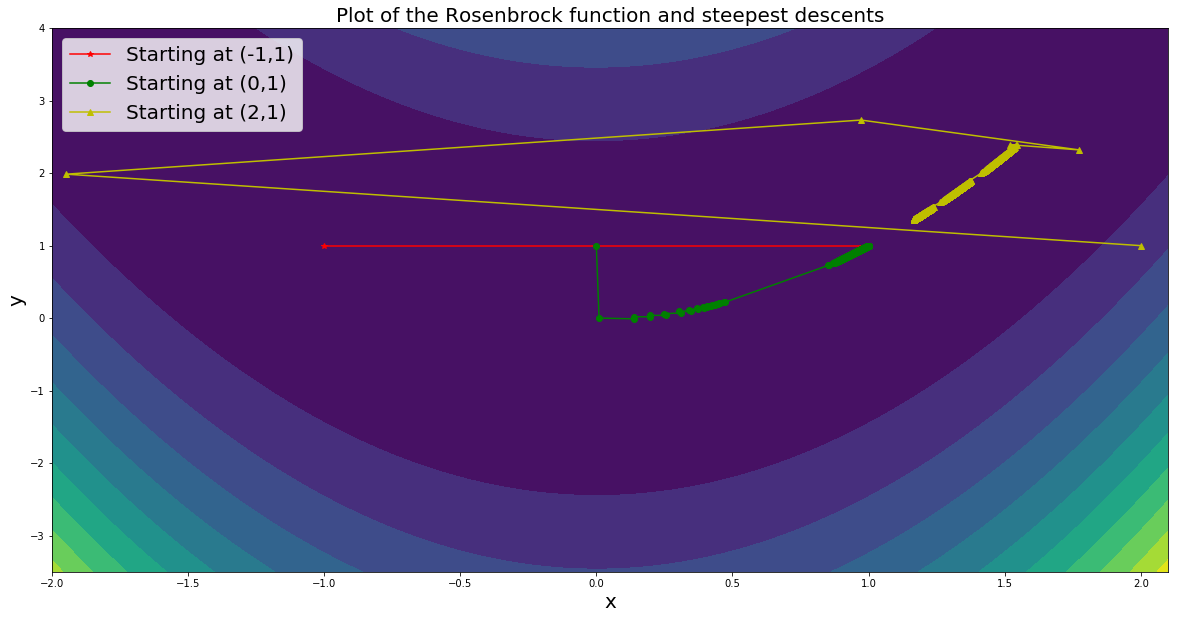

In [181]:
plt.figure(figsize=(20,10))
plt.contourf(xx,yy,zz, 10)
plt.plot(steepest_result_min1_1[2][:,0], steepest_result_min1_1[2][:,1], color="r", marker='*', label="Starting at (-1,1)")
plt.plot(steepest_result_0_1[2][:,0], steepest_result_0_1[2][:,1], color="g", marker='o', label="Starting at (0,1)")
plt.plot(steepest_result_2_1[2][:,0], steepest_result_2_1[2][:,1], color="y", marker='^', label="Starting at (2,1)")
plt.legend(fontsize=20)
plt.title("Plot of the Rosenbrock function and steepest descents", fontsize=20)
plt.ylabel("y", fontsize=20)
_ = plt.xlabel("x", fontsize=20)

#### b) Repeat a), but with Newton's method.

We need to define the Hessian matrix.

$$ H_f(x,y) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial xy} \\
\frac{\partial^2 f}{\partial yx} & \frac{\partial^2 f}{\partial y^2} \\
\end{bmatrix}
$$

$$ \frac{\partial^2 f}{\partial x^2} = 2 \left(600x^2 - 200y + 1\right) $$

$$ \frac{\partial^2 f}{\partial xy} = \frac{\partial^2 f}{\partial yx} = -400x $$

$$ \frac{\partial^2 f}{\partial y^2} = 200 $$

So,

$$ H_f(x,y) = \begin{bmatrix}
2 \left(600x^2 - 200y + 1\right) & -400x \\
-400x & 200 \\
\end{bmatrix}
$$

In [182]:
def hessian_rosenbrock(point):
    x, y = point
    cell_11 = 2 * (600 * x**2 - 200*y + 1)
    cell_21 = -400 * x
    cell_22 = 200
    
    return np.matrix([[cell_11, cell_21], [cell_21, cell_22]])

def newton_method(starting_point):
    max_iterations = 2000
    stop_step_size = 1e-8
    xk = starting_point
    trajectory = [[xk[0], xk[1]]]

    for _ in range(max_iterations):
        sk = np.linalg.solve(hessian_rosenbrock(xk), -grad_f(xk))
        xk += sk
        trajectory.append([xk[0], xk[1]])
        
        if np.linalg.norm(sk, 2) <= stop_step_size:
            break
            
    return xk, len(trajectory), np.array(trajectory)

In [183]:
newton_result_min1_1 = newton_method([-1, 1])
print("Starting at (-1, 1), it took {} iterations to reach {}".format(newton_result_min1_1[1], newton_result_min1_1[0]))
newton_result_0_1 = newton_method([0, 1])
print("Starting at (0, 1), it took {} iterations to reach {}".format(newton_result_0_1[1], newton_result_0_1[0]))
newton_result_2_1 = newton_method([2, 1])
print("Starting at (2, 1), it took {} iterations to reach {}".format(newton_result_2_1[1], newton_result_2_1[0]))

Starting at (-1, 1), it took 4 iterations to reach [1. 1.]
Starting at (0, 1), it took 7 iterations to reach [1. 1.]
Starting at (2, 1), it took 7 iterations to reach [1. 1.]


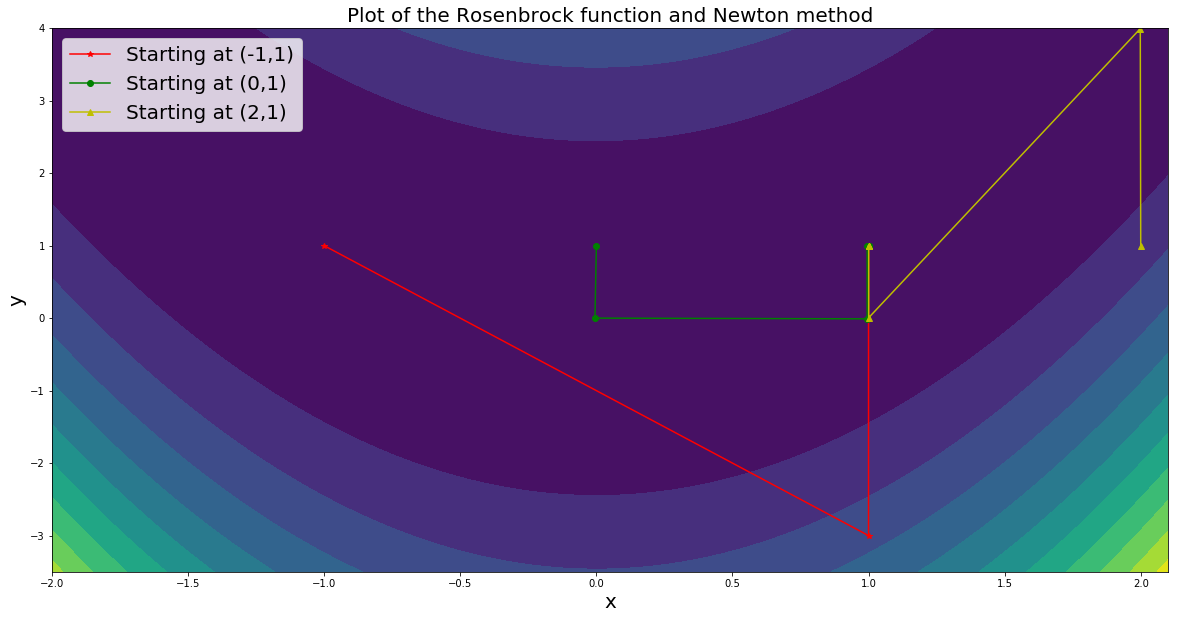

In [222]:
plt.figure(figsize=(20,10))
plt.contourf(xx,yy,zz, 10)
plt.plot(newton_result_min1_1[2][:,0], newton_result_min1_1[2][:,1], color="r", marker='*', label="Starting at (-1,1)")
plt.plot(newton_result_0_1[2][:,0], newton_result_0_1[2][:,1], color="g", marker='o', label="Starting at (0,1)")
plt.plot(newton_result_2_1[2][:,0], newton_result_2_1[2][:,1], color="y", marker='^', label="Starting at (2,1)")
plt.legend(fontsize=20)
plt.title("Plot of the Rosenbrock function and Newton method", fontsize=20)
plt.xlabel("x", fontsize=20)
_ = plt.ylabel("y", fontsize=20)

#### c) Repeat a), but with BFGS. Set $B_0$ to the identity matrix.

In [228]:
def BFGS(starting_point, B0=np.identity(2)):
    max_iterations = 2000
    stop_step_size = 1e-8
    xk = starting_point.copy()
    Bk = B0.copy()
    trajectory = [[xk[0], xk[1]]]

    for _ in range(max_iterations):
        grad_xk = grad_f(xk)
        sk = np.linalg.solve(Bk, -grad_xk)
        xk += sk
        trajectory.append([xk[0], xk[1]])
        
        if np.linalg.norm(sk, 2) <= stop_step_size:
            break
            
        # Calculating Bk with np.array will behave badly. The formula assumes we are working with
        # column-vectors, while np.arrays are row-vectors that can't be transposed.
        # To fix this, I transform them into matrices and transpose them (so that they are columns).
        yk = np.matrix(grad_f(xk) - grad_xk).T
        sk = np.matrix(sk).T

        Bk += (np.matmul(yk, yk.T) / np.dot(yk.T, sk)) - (np.matmul(np.matmul(np.matmul(Bk, sk), sk.T), Bk) / np.dot(np.matmul(sk.T, Bk), sk))
            
    return xk, len(trajectory), np.array(trajectory)

In [229]:
bfgs_result_min1_1 = BFGS([-1, 1])
print("Starting at (-1, 1), it took {} iterations to reach {}".format(bfgs_result_min1_1[1], bfgs_result_min1_1[0]))
bfgs_result_0_1 = BFGS([0, 1])
print("Starting at (0, 1), it took {} iterations to reach {}".format(bfgs_result_0_1[1], bfgs_result_0_1[0]))
bfgs_result_2_1 = BFGS([2, 1])
print("Starting at (2, 1), it stopped after {} iterations (maximum) to reach {}".format(bfgs_result_2_1[1], bfgs_result_2_1[0]))

Starting at (-1, 1), it took 125 iterations to reach [1. 1.]
Starting at (0, 1), it took 39 iterations to reach [1. 1.]
Starting at (2, 1), it stopped after 46 iterations (maximum) to reach [1. 1.]


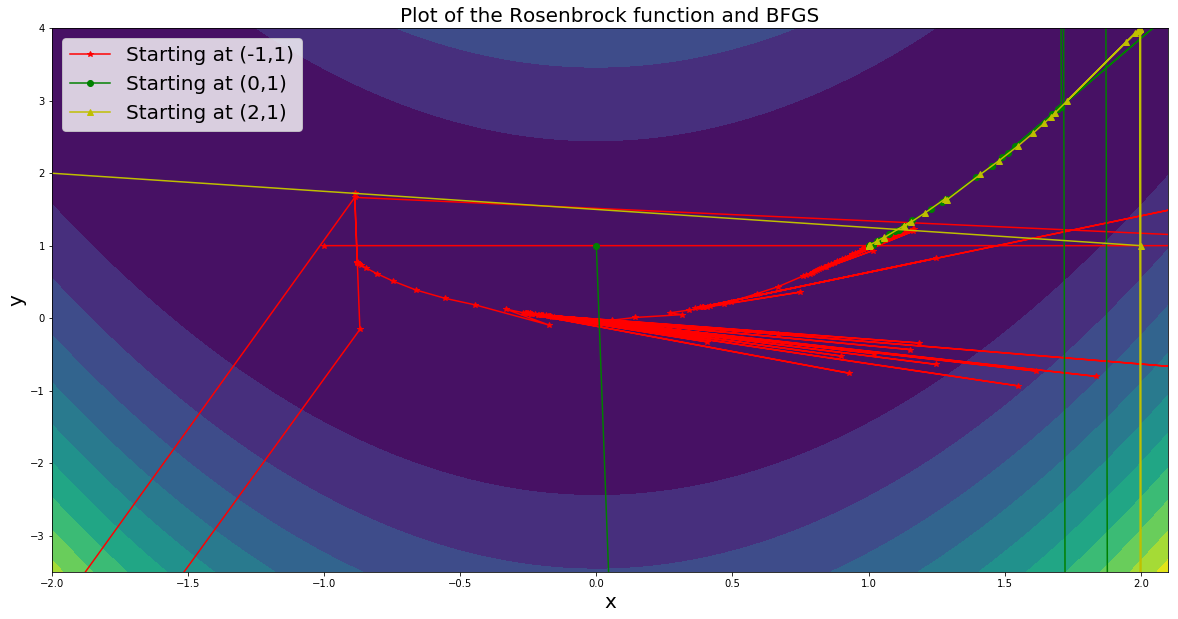

In [230]:
plt.figure(figsize=(20,10))
plt.contourf(xx,yy,zz, 10)
plt.plot(bfgs_result_min1_1[2][:,0], bfgs_result_min1_1[2][:,1], color="r", marker='*', label="Starting at (-1,1)")
plt.plot(bfgs_result_0_1[2][:,0], bfgs_result_0_1[2][:,1], color="g", marker='o', label="Starting at (0,1)")
plt.plot(bfgs_result_2_1[2][:,0], bfgs_result_2_1[2][:,1], color="y", marker='^', label="Starting at (2,1)")
plt.legend(fontsize=20)
plt.title("Plot of the Rosenbrock function and BFGS", fontsize=20)
plt.axis([-2, 2.1, -3.5, 4])
plt.xlabel("x", fontsize=20)
_ = plt.ylabel("y", fontsize=20)

### Question 2: Shape determination

#### a) Determine integral expressions for the components of $\nabla_b \mathcal{L}$ and for $\frac{\partial \mathcal{L}}{\partial \lambda}$. 

Recall that

$$ b=(b_1,b_2,\ldots,b_{19},b_{20}) \in \mathcal{R}^{20}$$

$$ y(x) = \sum_{k=1}^{20} b_k \sin \frac{\pi k x}{L} $$

$$ T = \int_0^L \rho y^2 \omega^2 \sqrt{1+\left(\tfrac{dy}{dx}\right)^2} dx = \rho \omega^2 \int_0^L y^2 \sqrt{1+\left(\tfrac{dy}{dx}\right)^2} dx$$

$$ I = \int_0^L \sqrt{1+\left(\tfrac{dy}{dx}\right)^2} dx $$

$$\mathcal{L}(b,\lambda)=T+\lambda(I-R)$$

*Let's analyze these equations...*

$$y^2(x) = \sum_{i=1, j=1}^{20} b_i b_j \sin\left(\frac{\pi i x}{L}\right) \sin\left(\frac{\pi j x}{L}\right)$$

$$ \frac{dy}{dx} = \frac{\pi}{L} \sum_{k=1}^{20} k \cdot b_k \cos \frac{\pi k x}{L}$$

Let's define $\phi(k) = k \cos \frac{\pi k x}{L}$. A more rigorous definition should probably be $\phi(k,x)$, but to be succinct, $x$ is ignored (even though $x$ is a parameter of the function).

$$ \frac{dy}{dx} = \frac{\pi}{L} \sum_{k=1}^{20} b_k \phi(k)$$

$$ \left( \frac{dy}{dx} \right)^2 = \frac{\pi^2}{L^2} \left[ \sum_{k=1}^{20} b_k \phi(k) \right]^2 = \frac{\pi^2}{L^2} \left[\sum_{i=1, j=1}^{20} b_i b_j \phi(i) \phi(j) \right] $$

$$\frac{\partial \mathcal{L}}{\partial \lambda} = I-R = \int_0^L \sqrt{1+\left(\tfrac{dy}{dx}\right)^2} dx - R$$

$$\boxed{\frac{\partial \mathcal{L}}{\partial \lambda} = \int_0^L \sqrt{1+\frac{\pi^2}{L^2} \left[\sum_{i=1, j=1}^{20} b_i b_j \phi(i) \phi(j) \right]} dx - R}$$

Say $b_r \in b$. If we analyze the last double summation of $\left(\frac{dy}{dx}\right)^2$, we can see that:
* only once in the inner-summation we will have $j=r$
* only once in the outer-summation we will have $i=r$
* out of the 20 iterations where $i = r$, 1 will have $j = r$
* out of the 20 iterations where $i = r$, 19 will have $j \neq r$
* out of the 19 other outer-summations of $i \neq r$, we will have $j=r$ once
* hence, we have 1 iteration where $i = j = r$, 19 iterations where $i = r \neq j$, and 19 iterations where $i \neq r = j$

From this information, we can derive

$$ \frac{\partial}{\partial b_r} \left( \frac{dy}{dx} \right)^2 = \frac{\pi^2}{L^2} \left[\frac{\partial}{\partial b_r} \left[b_r^2 \phi^2(r)\right] + \sum_{k \in \{1..20\}\setminus \{r\}} \frac{\partial}{\partial b_r} \left[2 b_r b_k \phi(k) \phi(r)\right] \right] = \frac{2\pi^2}{L^2} \left[b_r \phi^2(r) + \sum_{k \in \{1..20\}\setminus \{r\}} b_k \phi(k) \phi(r) \right] = \frac{2\pi^2 \phi(r)}{L^2} \left[\sum_{k=1}^{20} b_k \phi(k) \right]$$

$$\nabla_b \mathcal{L} = \begin{pmatrix}
\frac{\partial \mathcal{L}}{\partial b_1} & \frac{\partial \mathcal{L}}{\partial b_2} & \dots & \frac{\partial \mathcal{L}}{\partial b_{20}} \\
\end{pmatrix}$$

$$ \frac{\partial \mathcal{L}}{\partial b_r} = \frac{\partial T}{\partial b_r} + \lambda \frac{\partial I}{\partial b_r}$$

$$\frac{\partial T}{\partial b_r} = 
\rho \omega^2 \int_0^L \frac{\partial}{\partial b_r} \left[ y^2 \sqrt{1+\left(\tfrac{dy}{dx}\right)^2} \right] dx =
\rho \omega^2 \int_0^L \frac{\partial}{\partial b_r} \left[ y^2 \right] \sqrt{1+\left(\tfrac{dy}{dx}\right)^2} + y^2 \frac{\partial}{\partial b_r} \left[ \sqrt{1+\left(\tfrac{dy}{dx}\right)^2} \right] dx$$

$$\lambda \frac{\partial I}{\partial b_r} = 
\lambda \int_0^L \frac{\partial}{\partial b_r}\sqrt{1+\left(\tfrac{dy}{dx}\right)^2} dx $$

So, 

$$ \frac{\partial \mathcal{L}}{\partial b_r} = \frac{\partial T}{\partial b_r} + \lambda \frac{\partial I}{\partial b_r} =
\int_0^L \rho \omega^2 \left( \frac{\partial}{\partial b_r} \left[ y^2 \right] \sqrt{1+\left(\tfrac{dy}{dx}\right)^2} + y^2 \frac{\partial}{\partial b_r} \left[ \sqrt{1+\left(\tfrac{dy}{dx}\right)^2} \right] \right) + \lambda \frac{\partial}{\partial b_r}\sqrt{1+\left(\tfrac{dy}{dx}\right)^2} dx$$

$$=
\int_0^L \rho \omega^2 \frac{\partial}{\partial b_r} \left[ y^2 \right] \sqrt{1+\left(\tfrac{dy}{dx}\right)^2} + \left(\rho \omega^2 y^2 + \lambda \right) \frac{\partial}{\partial b_r} \left[ \sqrt{1+\left(\tfrac{dy}{dx}\right)^2} \right] dx$$

So, we need an expression for:
* $\frac{\partial}{\partial b_r} y^2$
* $\sqrt{1+\left(\tfrac{dy}{dx}\right)^2} = \sqrt{1+\frac{\pi^2}{L^2} \left[\sum_{i=1, j=1}^{20} b_i b_j \phi(i) \phi(j) \right]}$
* $y^2 = \sum_{i=1, j=1}^{20} b_i b_j \sin\left(\frac{\pi i x}{L}\right) \sin\left(\frac{\pi j x}{L}\right)$
* $\frac{\partial}{\partial b_r} \sqrt{1+\left(\tfrac{dy}{dx}\right)^2}$

$$\frac{\partial}{\partial b_r} y^2 =
\frac{\partial}{\partial b_r} \left[b_r^2 \sin^2\left(\frac{\pi r x}{L}\right)\right] + \sum_{k \in \{1..20\}\setminus \{r\}} \frac{\partial}{\partial b_r} \left[2 b_r b_k \sin\left(\frac{\pi k x}{L}\right) \sin\left(\frac{\pi r x}{L}\right)\right] = 
2\sin\left(\frac{\pi r x}{L}\right) \sum_{k=1}^{20} b_k \sin\left(\frac{\pi k x}{L}\right)$$


$$\frac{\partial}{\partial b_r} \sqrt{1+\left(\tfrac{dy}{dx}\right)^2} =
\frac{1}{2} \frac{\frac{\partial}{\partial b_r} \left( \frac{dy}{dx} \right)^2}{\sqrt{1+\left(\tfrac{dy}{dx}\right)^2}} =
\frac{\pi^2 \phi(r)}{L^2} \frac{\sum_{k=1}^{20} b_k \phi(k)}{\sqrt{1+\frac{\pi^2}{L^2} \left[\sum_{i=1, j=1}^{20} b_i b_j \phi(i) \phi(j) \right]}}
$$

We can now define $\frac{\partial \mathcal{L}}{\partial b_r}$, which is a component of our gradient $\nabla_b\mathcal{L}$:

$$ \boxed{\frac{\partial \mathcal{L}}{\partial b_r} = 
\int_0^L 2 \rho \omega^2 \sin\left(\frac{\pi r x}{L}\right) \sum_{k=1}^{20} \left(b_k \sin\left(\frac{\pi k x}{L}\right) \right) \sqrt{1+\frac{\pi^2}{L^2} \sum_{i=1, j=1}^{20} b_i b_j \phi(i) \phi(j)} + 
\left(\lambda + \rho \omega^2 \sum_{i=1, j=1}^{20} \left[b_i b_j \sin\left(\frac{\pi i x}{L}\right) \sin\left(\frac{\pi j x}{L}\right)\right]\right) \frac{\pi^2 \phi(r)}{L^2} \frac{\sum_{k=1}^{20} b_k \phi(k)}{\sqrt{1+\frac{\pi^2}{L^2} \left[\sum_{i=1, j=1}^{20} b_i b_j \phi(i) \phi(j) \right]}} dx}$$

#### b) Find the stationary points of $\mathcal{L}$ using the equations derived in a). Set $b_1 = 1.3$.

In [328]:
def solve_jump_rope(b):
    print(b)
    R = 3
    omega = L = rho = 1
    N = 20
    lam = b[-1]
    phi = lambda k, x: (k+1) * np.cos(np.pi * (k+1) * x / L)
    
    def integrate_trapz(f, a=0, b=L, n=251):
        xs = np.linspace(a, b, n)
        return np.trapz([f(x) for x in xs], xs)
    
    def dy_dx_2(x):
        res = 0.0
        
        for i in range(N):
            for j in range(N):
                res += b[i] * b[j] * phi(i, x) * phi(j, x)

        return res * np.pi**2 / L**2
        
    def part_L():
        return integrate_trapz(sqrt_dy_dx_2) - R

    def part_y_2(x, r):
        res = 0.0
        
        for k in range(N):
            res += b[k] * np.sin(np.pi * (k+1) * x / L)
            
        return 2.0 * np.sin(np.pi * (r+1) * x / L) * res

    def sqrt_dy_dx_2(x):
        return np.sqrt(1 + dy_dx_2(x))

    def part_dy_dx_2(x, r):
        res = 0.0
        
        for k in range(N):
            res += b[k] * phi(k, x)
            
        return 2.0 * np.pi**2 * phi(r, x) / L**2 * res

    def part_sqrt_dy_dx_2(x, r):
        return part_dy_dx_2(x, r) / 2.0 / sqrt_dy_dx_2(x)

    def y_2(x):
        res = 0
        
        for i in range(N):
            for j in range(N):
                res += b[i] * b[j] * np.sin(np.pi * (i+1) * x / L) * np.sin(np.pi * (j+1) * x / L)
                
        return res
    
    def grad_L(r):
        def integrand(x):
            first_term = rho * omega**2 * part_y_2(x, r) * sqrt_dy_dx_2(x)
            second_term = (rho * omega**2 * y_2(x) + lam) * part_sqrt_dy_dx_2(x, r)
            
            return first_term + second_term
        
        return integrate_trapz(integrand)
    
    results = [part_L()]
    for i in range(N):
        results.append(grad_L(i))
        
    return np.array(results)

b_lambda = np.zeros(21)
b_lambda[0] = 1.3
result_y1 = fsolve(solve_jump_rope, b_lambda)

[1.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0. ]
[1.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0. ]
[1.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0. ]
[1.30000002 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
[1.30000000e+00 1.49011612e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[1.30000000e+00 0.00000000e+00 1.49011612e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.0000000

[ 1.36992967e+00 -5.62984408e-06 -8.61480846e-03 -1.04201379e-05
  2.21928983e-02 -1.38596643e-05  1.98341327e-02 -1.57255500e-05
  2.58852350e-03 -1.59643606e-05 -8.60831564e-03 -1.46808797e-05
 -9.79718571e-03 -1.21437313e-05 -5.06550384e-03 -8.78204721e-06
 -1.89742439e-04 -5.04037598e-06  8.01203731e-04 -1.63319249e-06
 -2.20226644e+00]
[ 1.38010459e+00 -1.07954099e-07  2.81838127e-03 -7.62884102e-08
  1.70270146e-02  5.53746063e-08  1.33087273e-02  1.93878782e-07
  2.07443257e-03  2.84142714e-07 -5.95796287e-03  3.08724366e-07
 -8.94066599e-03  2.73204748e-07 -7.96743361e-03  1.97123457e-07
 -4.67582410e-03  1.07187456e-07 -1.45779117e-03  3.24055770e-08
 -2.20088283e+00]
[ 1.38010457e+00 -1.07954097e-07  2.81838127e-03 -7.62884102e-08
  1.70270146e-02  5.53746063e-08  1.33087273e-02  1.93878782e-07
  2.07443257e-03  2.84142714e-07 -5.95796287e-03  3.08724366e-07
 -8.94066599e-03  2.73204748e-07 -7.96743361e-03  1.97123457e-07
 -4.67582410e-03  1.07187456e-07 -1.45779117e-03  3.24

[ 1.41209117e+00  1.24452308e-04  4.96351182e-02  1.47310975e-06
  1.35109841e-02  3.27567237e-06  8.12303221e-03  4.15332052e-07
  1.44185302e-03 -4.91852760e-07 -3.33975486e-03  1.38919534e-06
 -5.89125416e-03  1.27347261e-06 -5.53261880e-03  7.33945809e-07
 -3.20679551e-03  2.10596727e-07 -9.12833329e-04  2.20717721e-06
 -2.19417991e+00]
[ 1.43829600e+00  8.10299517e-05  9.33168236e-02  5.38716994e-05
  8.79578866e-03 -1.96741433e-06  2.53769780e-03 -6.04539298e-06
  1.02226149e-03  1.73884286e-06 -8.69819123e-04  4.31983759e-06
 -1.12146046e-03  1.28444642e-06 -1.51448603e-03  1.27955586e-06
 -9.08361165e-04  1.95551639e-06 -1.93677125e-04 -2.38475228e-06
 -2.20893167e+00]
[ 1.44349087e+00 -1.10658558e-05  1.00021442e-01 -3.48373922e-05
  8.15661014e-03  6.70205696e-06  1.19300533e-03 -1.63663662e-06
  3.39703596e-04 -4.98164523e-06  3.56529757e-04  3.48367598e-06
 -7.06802176e-04  6.08858497e-06 -2.58934085e-04  5.88969213e-06
 -1.17379393e-04  1.31162078e-06 -2.64124430e-04  2.73

[ 1.44349087e+00 -1.10658558e-05  1.00021442e-01 -3.48373922e-05
  8.15661014e-03  6.70205696e-06  1.19300533e-03 -1.63663662e-06
  3.39703596e-04 -4.98164523e-06  3.56529757e-04  3.48367598e-06
 -7.06802176e-04  6.08858497e-06 -2.58934085e-04  5.88969213e-06
 -1.17379393e-04  1.31162078e-06 -2.64124430e-04  2.73740498e-06
 -2.20966643e+00]
[ 1.44298172e+00  1.59499488e-06  1.00193905e-01  2.40197809e-07
  7.49664088e-03  5.30927275e-08  5.69932951e-04  8.36565793e-08
  5.26040733e-05 -2.69467225e-07 -2.59409443e-07  2.24968499e-08
  4.38854954e-06  6.99794145e-08 -2.14728545e-06 -1.13293820e-07
 -1.61418643e-06 -3.12947175e-09  4.47441757e-06  1.06162584e-07
 -2.20982649e+00]
[ 1.44288736e+00 -1.99549252e-07  1.00090291e-01 -5.81436038e-08
  7.50039300e-03  1.73633407e-08  5.61844924e-04 -1.04380386e-08
  4.17322481e-05  9.44776028e-10  3.60639793e-06  2.68669064e-09
  3.09767698e-08 -3.95037214e-09  2.34477082e-07  3.72034610e-09
  1.94946992e-07 -3.77241259e-09 -2.74489028e-07 -2.43

In [335]:
def y(x, b):
    res = 0
    
    for k in range(20):
        res += b[k] * np.sin(np.pi * (k+1) * x / L)
        
    return res

def plot_y(b, title):
    xs = np.linspace(0, 1, 1000)
    
    plt.figure(figsize=(20,10))
    plt.title(title, fontsize=20)
    plt.scatter(xs, [y(x, b) for x in xs])
    plt.xlabel("x", fontsize=20)
    plt.ylabel("y", fontsize=20)

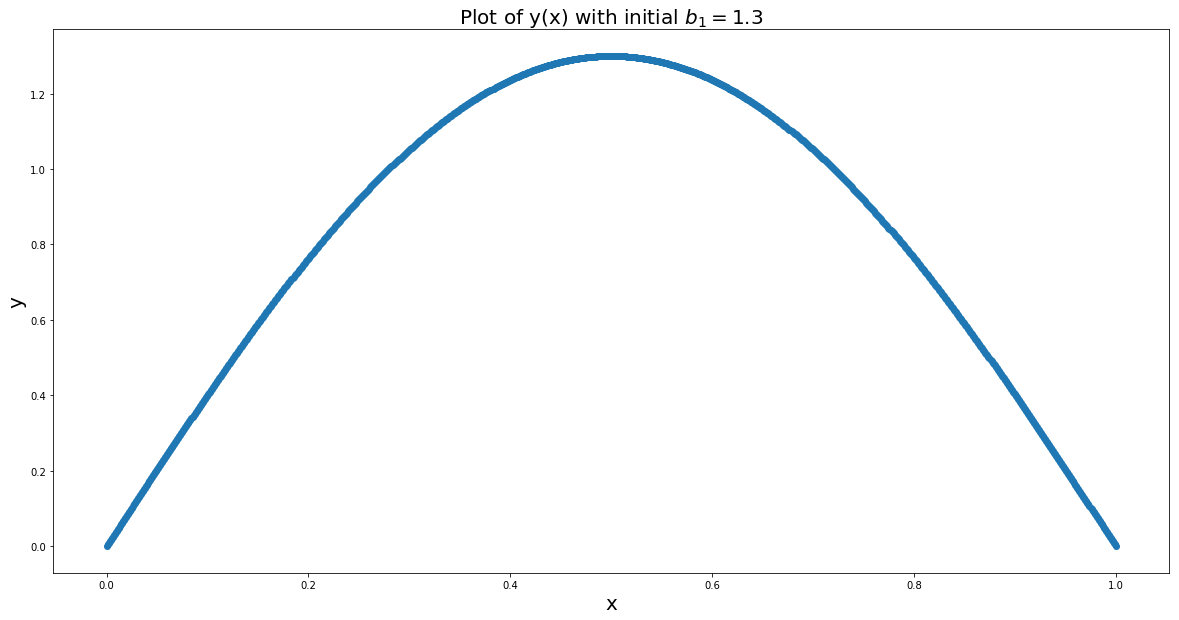

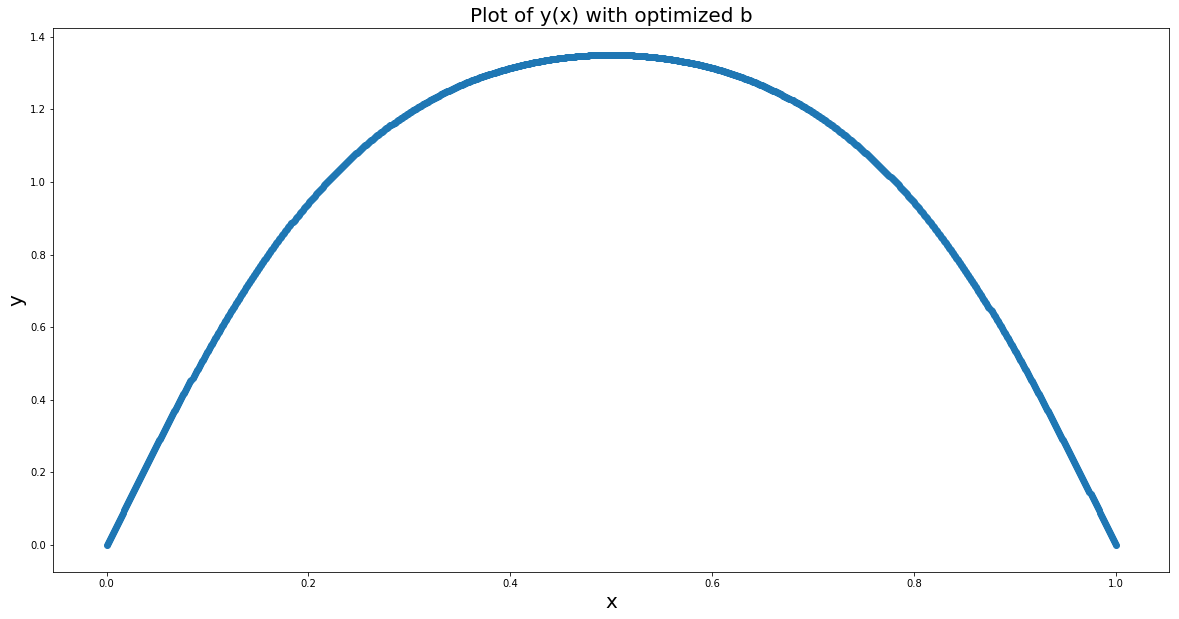

In [336]:
plot_y(b_lambda, r"Plot of y(x) with initial $b_1 = 1.3$")
plot_y(result_y1, "Plot of y(x) with optimized b")

In [338]:
print("initial b")
print(solve_jump_rope(b_lambda))
print("\nresulting b")
print(solve_jump_rope(result_y1))

initial b
[1.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0. ]
[-1.44486009e-01  3.71216819e+00  1.11022302e-16 -2.69941738e+00
  0.00000000e+00  1.89952249e+00  4.44089210e-16 -1.30017146e+00
  4.44089210e-16  8.73635147e-01 -3.33066907e-16 -5.79430015e-01
 -2.22044605e-16  3.80609721e-01 -7.77156117e-16 -2.48159499e-01
  2.22044605e-16  1.60849738e-01  2.10942375e-15 -1.03759430e-01
 -2.33146835e-15]

resulting b
[ 1.44289102e+00  2.83912379e-11  1.00094880e-01  6.63099328e-12
  7.50006855e-03 -1.22553926e-12  5.62211240e-04  2.33579797e-12
  4.21439096e-05 -8.56220960e-13  3.15914909e-06 -7.37454554e-13
  2.36812390e-07 -8.42196883e-15  1.77508091e-08 -1.37598709e-12
  1.32746627e-09  2.91496825e-13  9.25866752e-11  5.00756027e-13
 -2.20982903e+00]
[-9.50350909e-13 -1.15393112e-12 -1.30447944e-11  3.33938432e-12
 -1.26619271e-11 -1.19928512e-11  7.14460158e-11 -7.96901434e-12
 -1.17909571e-10  3.73515940e-11  8.46231973e-11 -4.21640500e-11
  2.298683

We can see that the resulting values of $b$ and $\lambda$ have optimized $\mathcal{L}$, such that all its derivatives are very close to 0. 

#### c) Find the stationary points of $\mathcal{L}$ using the equations derived in a). Set $b_2 = 0.7$.

In [339]:
b_lambda2 = np.zeros(21)
b_lambda2[1] = 0.7
result_y2 = fsolve(solve_jump_rope, b_lambda2)

[0.  0.7 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0. ]
[0.  0.7 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0. ]
[0.  0.7 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0. ]
[1.49011612e-08 7.00000000e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[0.         0.70000001 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
[0.00000000e+00 7.00000000e-01 1.49011612e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.0000000

[-8.56131891e-10  6.66737883e-01  1.42726141e-09 -2.46829629e-09
  3.10138571e-09 -3.81889449e-02  6.57317076e-10 -3.68075810e-09
  3.66010984e-09 -1.73327973e-02  1.18073403e-10 -3.18282292e-09
  2.14409220e-09 -5.61314247e-03  3.10964392e-10 -1.63704373e-09
  6.90266914e-10 -1.56774513e-03  2.31222217e-10 -3.89308973e-10
 -5.52898217e-01]
[-8.56131891e-10  6.66737873e-01  1.42726143e-09 -2.46829629e-09
  3.10138571e-09 -3.81889449e-02  6.57317076e-10 -3.68075810e-09
  3.66010984e-09 -1.73327973e-02  1.18073403e-10 -3.18282292e-09
  2.14409220e-09 -5.61314247e-03  3.10964392e-10 -1.63704373e-09
  6.90266914e-10 -1.56774513e-03  2.31222217e-10 -3.89308973e-10
 -5.52898217e-01]
[-8.56131891e-10  6.66737873e-01  1.42726141e-09 -2.46829625e-09
  3.10138571e-09 -3.81889449e-02  6.57317076e-10 -3.68075810e-09
  3.66010984e-09 -1.73327973e-02  1.18073403e-10 -3.18282292e-09
  2.14409220e-09 -5.61314247e-03  3.10964392e-10 -1.63704373e-09
  6.90266914e-10 -1.56774513e-03  2.31222217e-10 -3.89

[ 3.71390175e-04  7.23514584e-01 -2.55793210e-04  5.10736829e-05
  3.26770173e-03  4.84256459e-02  6.99496563e-04  1.82472990e-03
 -7.11134522e-04 -4.67653201e-03 -1.65918149e-04 -1.95828262e-04
 -3.37695419e-05 -5.45993211e-03  1.62730828e-04 -5.46180818e-04
 -6.50687757e-04 -2.51699926e-03 -2.32556566e-04  2.27075192e-04
 -5.55276707e-01]
[ 7.82335899e-05  7.23078241e-01  1.29751350e-04  6.18483033e-05
  1.00729032e-03  4.98866468e-02  1.90076638e-04  2.85063085e-04
  1.80005935e-04  8.58340635e-04 -7.25072243e-05 -1.36950976e-04
  6.11104930e-05 -5.89670995e-04  8.35897251e-05 -1.79683893e-04
 -2.07493427e-04 -1.50794824e-04 -8.72960247e-05  9.28598075e-05
 -5.52828629e-01]
[ 1.04680793e-04  7.17818469e-01 -5.86469628e-05  6.57996440e-05
  1.22970474e-03  4.29175361e-02  2.35952061e-04  5.92101701e-04
 -2.23819450e-04 -8.30589354e-04 -7.20101103e-05 -7.10447357e-05
  6.10608486e-06 -3.30900478e-03  6.14408774e-05 -1.66383570e-04
 -2.46506194e-04 -1.79598887e-03 -7.51982009e-05  7.42

[ 7.77937795e-05  7.21419006e-01 -6.34460312e-05  1.50481627e-05
  3.45299525e-05  4.99978403e-02 -9.45276625e-06  6.49159175e-06
  3.28414525e-06  3.73205703e-03 -2.00720379e-06  3.92922167e-06
  3.02908468e-06  2.71754172e-04  1.72703033e-06  3.12170075e-06
  1.92537502e-06  1.61135174e-05  2.88975239e-06  1.34021390e-06
 -5.52454484e-01]
[-1.83129388e-05  7.21445088e-01  1.89541615e-05  1.36994304e-06
 -5.69578102e-06  5.00445700e-02  4.06112774e-06  1.15049700e-06
 -5.11536215e-07  3.74675558e-03  6.35333283e-07  1.03345724e-06
 -1.88990717e-07  2.78973021e-04 -9.41520746e-08  5.48029391e-07
  3.93589480e-08  1.92027074e-05 -3.54780967e-07  2.33223229e-07
 -5.52456974e-01]
[-1.14642026e-06  7.21445643e-01  1.07703904e-06  7.85747742e-07
 -2.42055484e-07  5.00473353e-02  2.36359382e-07  3.60469057e-07
  1.51133096e-07  3.74952841e-03  1.63137257e-07  1.75101717e-07
  5.65990760e-08  2.80246981e-04  5.09657649e-08  8.51404569e-08
 -2.50295952e-09  1.94660210e-05  1.08824564e-08  1.80

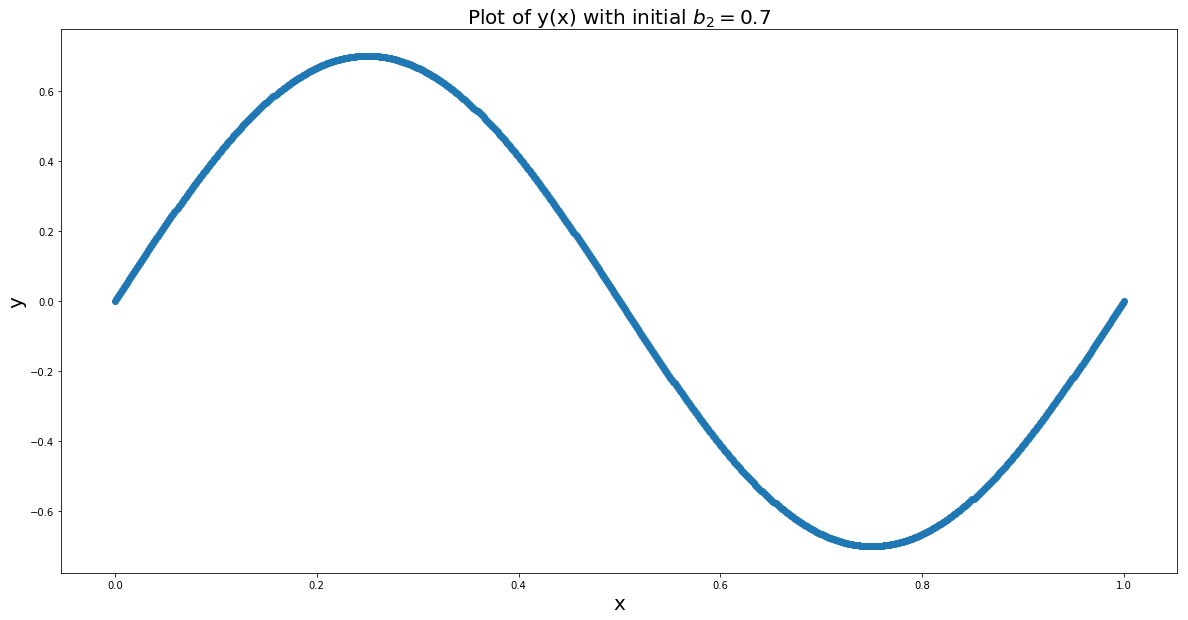

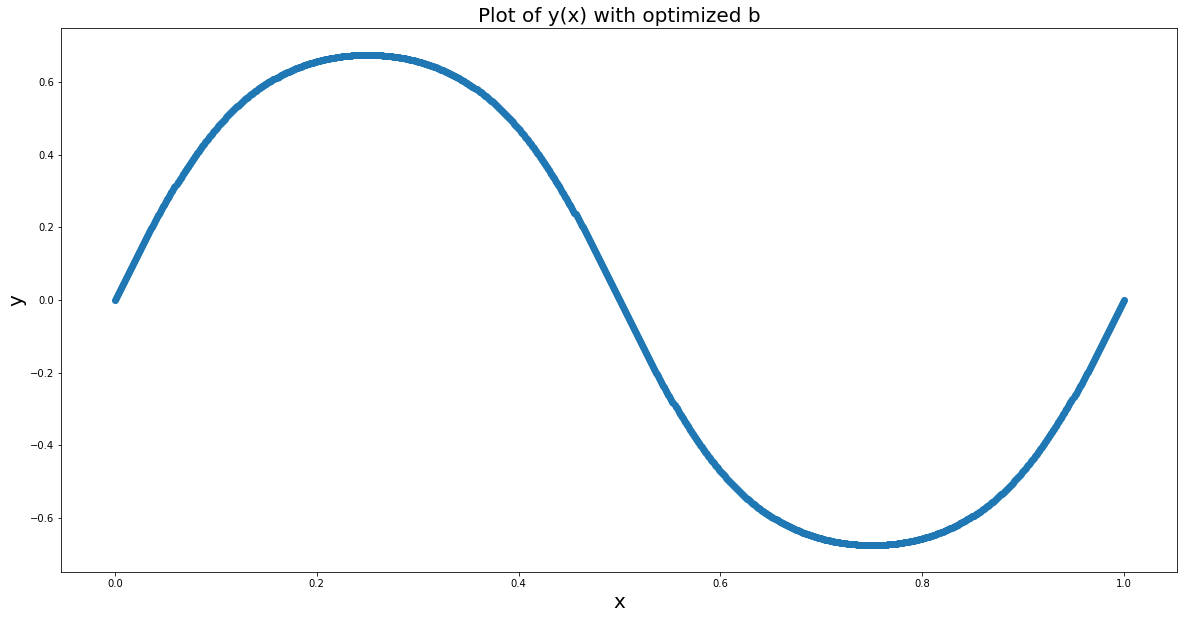

In [340]:
plot_y(b_lambda2, r"Plot of y(x) with initial $b_2 = 0.7$")
plot_y(result_y2, "Plot of y(x) with optimized b")

In [341]:
print("initial b")
print(solve_jump_rope(b_lambda2))
print("\nresulting b")
print(solve_jump_rope(result_y2))

initial b
[0.  0.7 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0. ]
[ 4.27396321e-02  0.00000000e+00  2.12991774e+00  0.00000000e+00
  1.25767452e-17 -1.11022302e-16 -1.59854926e+00  1.11022302e-16
  5.24753851e-17 -6.66133815e-16  1.16085070e+00  1.49880108e-15
  3.77302356e-16 -8.88178420e-16 -8.20648737e-01 -1.33226763e-15
  1.73472348e-17  7.77156117e-16  5.69809369e-01  9.15933995e-16
  1.42247325e-16]

resulting b
[ 3.61311469e-12  7.21445497e-01 -4.41987364e-12  1.44418899e-12
 -4.66767783e-13  5.00473784e-02 -4.65584270e-13  1.69679522e-13
 -8.42814159e-13  3.74980724e-03 -1.32663207e-13 -3.38796848e-13
  8.95827270e-15  2.80369428e-04 -3.41503938e-13 -7.03983425e-15
  1.59752861e-13  1.94822259e-05 -6.52271017e-14  4.38447640e-14
 -5.52457258e-01]
[-4.29434266e-13  4.69402295e-13 -7.69329045e-13  1.38722367e-12
 -6.91863233e-13 -4.81170659e-13  2.20759522e-12 -2.07794892e-12
 -8.04190048e-13  4.29661862e-12 -3.12228021e-12 -7.11930515e-13
  4.668709

Again, we can see that the resulting values of $b$ and $\lambda$ have optimized $\mathcal{L}$, such that all its derivatives are very close to 0.

### Question 3: Quantum eigenmodes

#### a) Compute the five lowest eigenvalues and corresponding eigenmodes for the potentials

1. $v_1(x) = |x|$
2. $v_2(x) = 12\left(\frac{x}{10}\right)^4 - \left(\frac{x^2}{18}\right) + \left(\frac{x}{8}\right) + \left(\frac{13}{10}\right)$
3. $v_3(x) = 8|||x| - 1| - 1|$

Schrödinger's equation: $-\Psi''(x) + v(x) \Psi(x) = E\Psi(x)$

Using a second-order finite difference of $\Psi$ over $\{x_1, x_2, ..., x_{1921}\}$ (which are equally spaced from $[-12, 12]$), we get

$$\Psi''(x_i) \approx \frac{\Psi(x_{i-1}) - 2\Psi(x_i) + \Psi(x_{i+1})}{\Delta x^2}$$

Note that $\Delta x = \frac{12 - -12}{1920} = \frac{1}{80}$, so $\Delta x^2 = \frac{1}{6400}$.

If we plug the finite difference into Schrödinger's equation, we get

$$-\frac{\Psi(x_{i-1}) - 2\Psi(x_i) + \Psi(x_{i+1})}{\Delta x^2} + v(x_i) \Psi(x_i) \approx E \Psi(x_i)$$

$$ \left[\frac{-1}{\Delta x^2}\right]\Psi(x_{i-1}) + \left[\frac{-1}{\Delta x^2}\right]\Psi(x_{i+1}) + \left[ v(x_i) + \frac{2}{\Delta x^2}\right] \Psi(x_i) \approx E \Psi(x_i)$$

In the end, we want to solve $\Psi(x) \, \forall x$, so we can rewrite this as a matrix

$$
\begin{bmatrix}
\left[\frac{-1}{\Delta x^2}\right]\Psi(x_{3}) + \left[ v(x_2) + \frac{2}{\Delta x^2}\right] \Psi(x_2) \\
\left[\frac{-1}{\Delta x^2}\right]\Psi(x_{2}) + \left[\frac{-1}{\Delta x^2}\right]\Psi(x_{4}) + \left[ v(x_3) + \frac{2}{\Delta x^2}\right] \Psi(x_3) \\
\vdots \\
\left[\frac{-1}{\Delta x^2}\right]\Psi(x_{1918}) + \left[\frac{-1}{\Delta x^2}\right]\Psi(x_{1920}) + \left[ v(x_{1919}) + \frac{2}{\Delta x^2}\right] \Psi(x_{1919}) \\
\left[\frac{-1}{\Delta x^2}\right]\Psi(x_{1919}) + \left[ v(x_{1920}) + \frac{2}{\Delta x^2}\right] \Psi(x_{1920}) \\
\end{bmatrix} \approx
\begin{bmatrix}
E \Psi(x_2) \\
E \Psi(x_3) \\
\vdots \\
E \Psi(x_{1919}) \\
E \Psi(x_{1920}) \\
\end{bmatrix}
$$

Note that, by the boundary conditions, we know that $\Psi(x_{1}) = \Psi(x_{1921}) = 0$, so we removed them from the matrix.

This last matrix can be rewritten as

$$
\begin{bmatrix}
v(x_2) + \frac{2}{\Delta x^2} & \frac{-1}{\Delta x^2} & 0 & 0 & 0 & \dots & 0 \\
\frac{-1}{\Delta x^2} & v(x_3) + \frac{2}{\Delta x^2} & \frac{-1}{\Delta x^2} & 0 & 0 & \dots & 0 \\
0 & \frac{-1}{\Delta x^2} & v(x_4) + \frac{2}{\Delta x^2} & \frac{-1}{\Delta x^2} & 0 & \dots & 0 \\
 & & & \ddots & & \\
0 & \dots & 0 & 0 & \frac{-1}{\Delta x^2} & v(x_{1919}) + \frac{2}{\Delta x^2} & \frac{-1}{\Delta x^2} \\
0 & \dots & 0 & 0 & 0 & \frac{-1}{\Delta x^2} & v(x_{1920}) + \frac{2}{\Delta x^2} \\
\end{bmatrix} \begin{bmatrix}
\Psi(x_2) \\
\Psi(x_3) \\
\Psi(x_4) \\
\vdots \\
\Psi(x_{1919}) \\
\Psi(x_{1920}) \\
\end{bmatrix} \approx
E \begin{bmatrix}
\Psi(x_2) \\
\Psi(x_3) \\
\Psi(x_4) \\
\vdots \\
\Psi(x_{1919}) \\
\Psi(x_{1920}) \\
\end{bmatrix}
$$

Which, as you can see, is an eigenvalue problem! $M \, \Psi = E \, \Psi$.

In [44]:
n_M = 1919 # removed 2 to the 1921 (due to boundaries)
delta_x = 1/80
delta_x2 = 1/6400

def build_M(v):
    M = np.zeros((n_M, n_M))
    
    for i in range(n_M):
        if i-1 >= 0:
            M[i,i-1] = -1/delta_x2
        if i+1 < n_M:
            M[i,i+1] = -1/delta_x2
            
        M[i,i] = v(-12. + (i+1)*delta_x) + 2/delta_x2
        
    return M

test_v = lambda x: x**2/10
v1 = lambda x: abs(x)
v2 = lambda x: 12 * (x/10)**4 - x**2/18 + x/8 + 13/10
v3 = lambda x: 8 * abs(abs(abs(x) - 1) - 1)

M_test_v = build_M(test_v)
M_v1 = build_M(v1)
M_v2 = build_M(v2)
M_v3 = build_M(v3)

In [93]:
print("Computing Eigs of test_v")
eigs_test_v = np.linalg.eig(M_test_v)

print("Computing Eigs of v1")
eigs_v1 = np.linalg.eig(M_v1)

print("Computing Eigs of v2")
eigs_v2 = np.linalg.eig(M_v2)

print("Computing Eigs of v3")
eigs_v3 = np.linalg.eig(M_v3)

Computing Eigs of test_v
Computing Eigs of v1
Computing Eigs of v2
Computing Eigs of v3


In [232]:
import heapq

def get_five_lowest_eigs(eigs):
    vals, vecs = eigs
    vals_heap = [(val, i) for i, val in enumerate(vals)]
    heapq.heapify(vals_heap)
    
    lowest_vals, lowest_vecs = [], [] 
    for _ in range(5):
        val, i = heapq.heappop(vals_heap)
        lowest_vals.append(round(val,7))
        lowest_vecs.append([0] + vecs[:,i].tolist() + [0]) # add psi(1) and psi(1921)
        
    return lowest_vals, lowest_vecs

lowest_eigs_test_v = get_five_lowest_eigs(eigs_test_v)
lowest_eigs_v1 = get_five_lowest_eigs(eigs_v1)
lowest_eigs_v2 = get_five_lowest_eigs(eigs_v2)
lowest_eigs_v3 = get_five_lowest_eigs(eigs_v3)

In [243]:
def display_eigs(lowest_eigs, v, v_name, ylim):
    lowest_vals, lowest_vecs = lowest_eigs
    
    xs = [-12. + i*delta_x for i in range(1921)]
    vs = [v(x) for x in xs]
    
    plt.figure(figsize=(20,10))
    plt.title("5 lowest eigenvalues for " + v_name, fontsize=20)
    plt.xlim(-12, 12)
    plt.ylim(-0.1, ylim)
    plt.xlabel("x", fontsize=20)
    plt.ylabel("Energy", fontsize=20)
    plt.plot(xs, vs, color="k")
    
    for val in lowest_vals:
        plt.axhline(val, color="k", alpha=0.5)
    
    plt.table(cellText=np.matrix(list(reversed(lowest_vals))).T.tolist(),
              bbox=[1.022, 0, .1, 1],
                  rowLabels=[r'$E_{%d}$' % i for i in (5, 4, 3, 2, 1)],
                  loc='right').set_fontsize(20)
    
    for i in range(len(lowest_vals)):
        ys = [3 * lowest_vec_ij + lowest_vals[i] for lowest_vec_ij in lowest_vecs[i]]
        plt.plot(xs, ys)

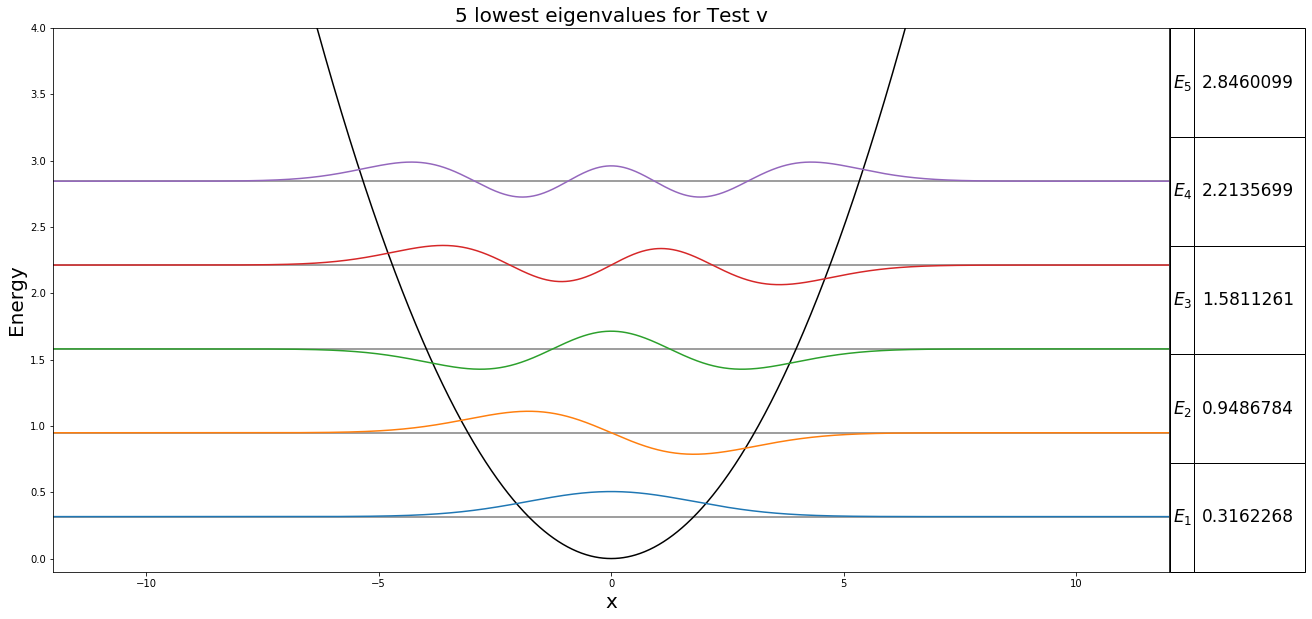

In [244]:
display_eigs(lowest_eigs_test_v, test_v, "Test v", 4)

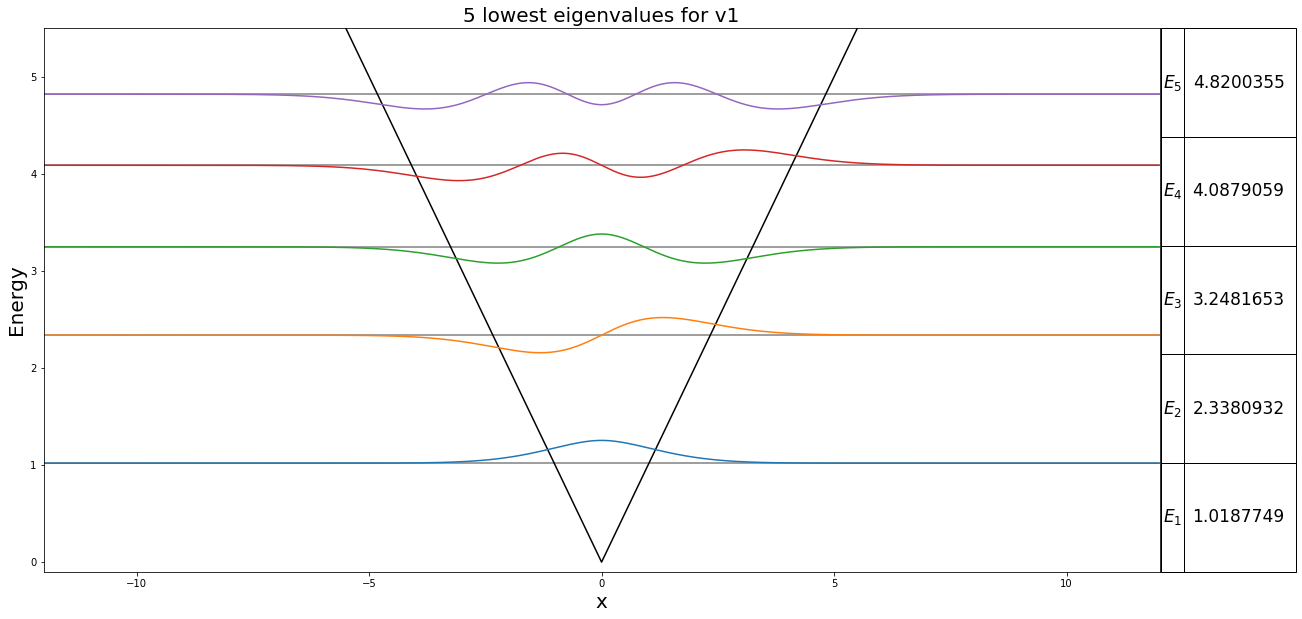

In [216]:
display_eigs(lowest_eigs_v1, v1, "v1", 5.5)

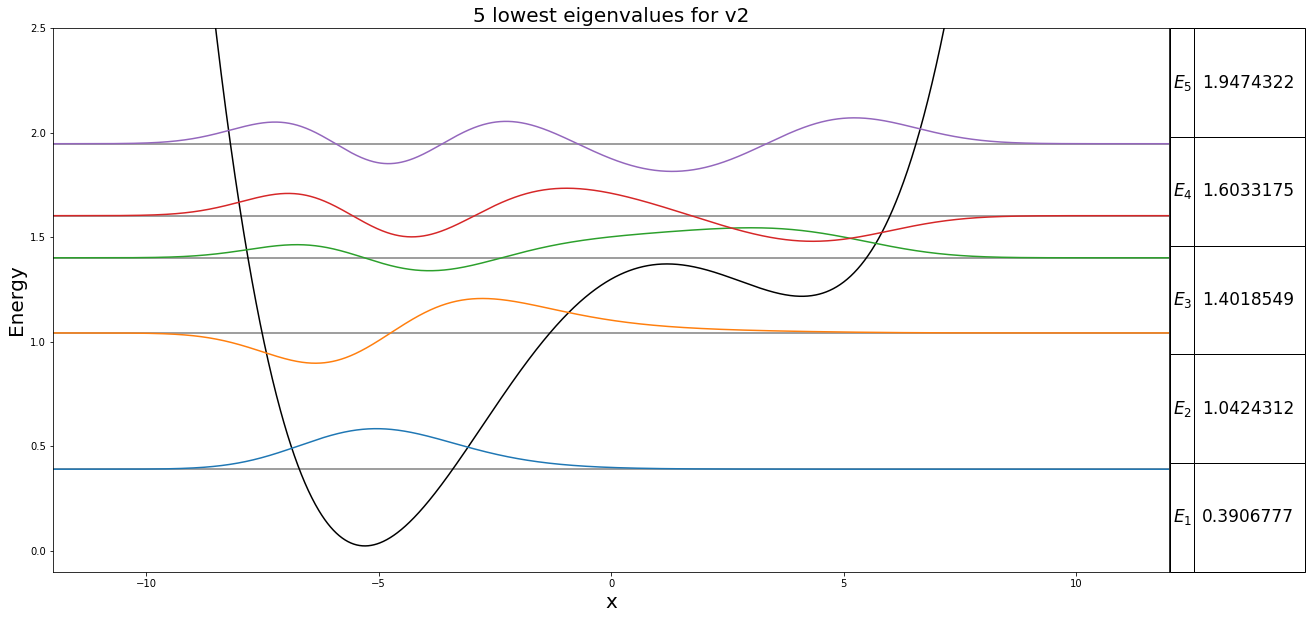

In [218]:
display_eigs(lowest_eigs_v2, v2, "v2", 2.5)

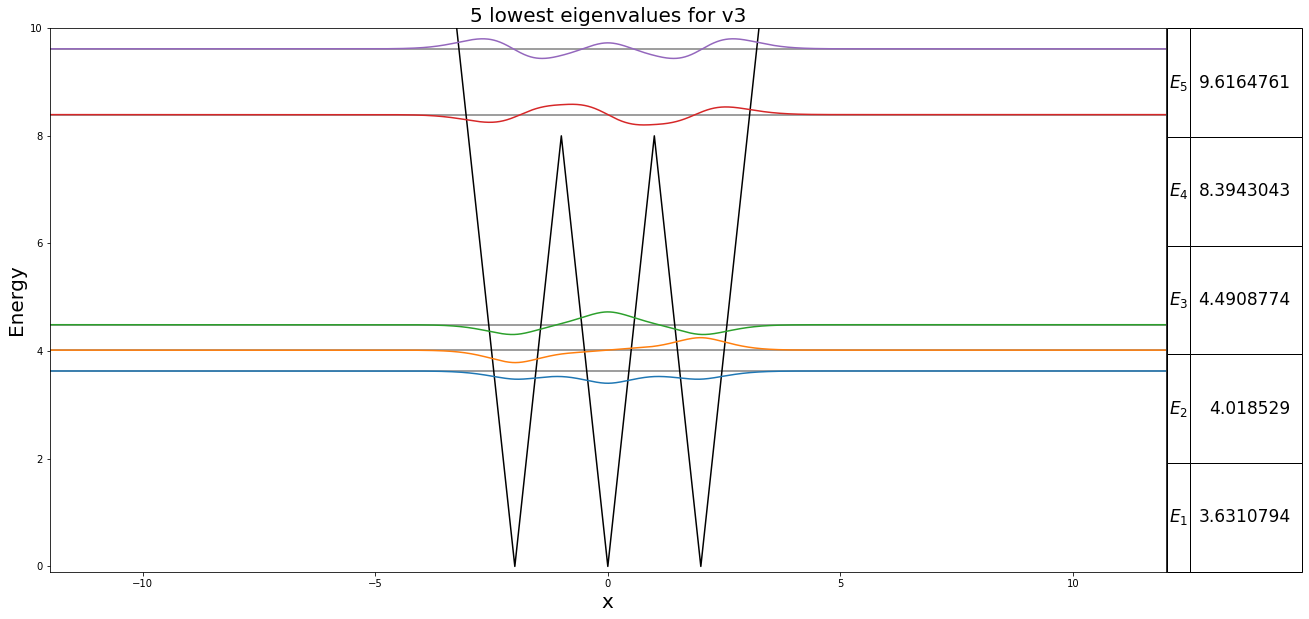

In [220]:
display_eigs(lowest_eigs_v3, v3, "v3", 10)

#### b) Compute the probability of finding a particle in the region $x \in [0,6]$, one for each eigemode for the potential $v_2$.

In [268]:
def simpson(fs):
    area = 0
    n = len(fs)

    for i, f in enumerate(fs):
        if i == 0 or i == n-1:
            area += f
        elif i % 2 == 0:
            area += 2*f
        else:
            area += 4*f
    
    return area
    
def get_probability_psi(psi):
    domain = [-12. + i*delta_x for i in range(1921)]
    psi2 = list(map(lambda x: x**2, psi))
    
    # get denominator
    start_ind, end_ind = domain.index(0.), domain.index(6.)
    psi2_numerator = psi2[start_ind:end_ind+1]
    
    numerator = simpson(psi2_numerator)
    
    # get numerator
    denominator = simpson(psi2)

    return numerator / denominator, np.trapz(psi2_numerator) / np.trapz(psi2)

In [272]:
for i in range(5):
    prob_simpson, prob_check = get_probability_psi(lowest_eigs_v2[1][i])
    print("At energy level {} in v2, the probability of finding a particle in region [0,6] is {}".format(i+1, prob_simpson))
    print("As a check, running `np.trapz` with the same points gave {}".format(prob_check))
    print("The difference between the two is {}\n".format(abs(prob_simpson - prob_check)))

At energy level 1 in v2, the probability of finding a particle in region [0,6] is 0.0003152041899662361
As a check, running `np.trapz` with the same points gave 0.00031521983149229986
The difference between the two is 1.564152606379045e-08

At energy level 2 in v2, the probability of finding a particle in region [0,6] is 0.030363090264022688
As a check, running `np.trapz` with the same points gave 0.03036355760528918
The difference between the two is 4.673412664912835e-07

At energy level 3 in v2, the probability of finding a particle in region [0,6] is 0.7873047703762648
As a check, running `np.trapz` with the same points gave 0.7873036769976857
The difference between the two is 1.0933785791200634e-06

At energy level 4 in v2, the probability of finding a particle in region [0,6] is 0.39990229995014054
As a check, running `np.trapz` with the same points gave 0.39990264171280515
The difference between the two is 3.4176266461294347e-07

At energy level 5 in v2, the probability of findin